In [1]:
# import data preprocessing and visualization packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# read in the file that has the continuous variables 
df = pd.read_csv('data/continuous.csv')
df.head()

,ACT,SAT Math USE,SAT Reading USE,SAT Total USE,RGPA,High School GPA,IR Score,Class Rank,Class Size,Class Percentile
0,NaN,NaN,NaN,NaN,2.15,NaN,NaN,213.0,213.0,0.00
1,NaN,450.0,440.0,890.0,2.52,NaN,NaN,137.0,138.0,0.01
2,18.0,NaN,NaN,NaN,1.24,NaN,NaN,65.0,66.0,0.02
3,NaN,NaN,NaN,NaN,1.90,NaN,NaN,121.0,125.0,0.03
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,113.0,0.04


In [3]:
# replace null value using the mean
for value in df.columns:
    df.fillna(df.mean(), inplace=True)
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Skew Handling

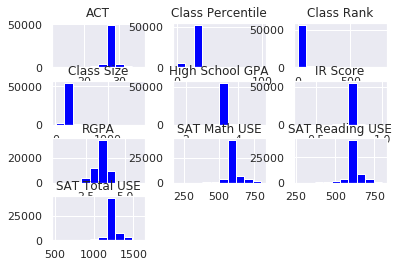

In [4]:
# examine distribution of each column
for col in df.columns:
    df.hist(color='blue')
    break
plt.show()

In [5]:
# examine the skew of each column
df.skew()

ACT                -0.922700
SAT Math USE       -0.441862
SAT Reading USE    -1.043565
SAT Total USE      -0.985630
RGPA               -0.556218
High School GPA    -1.426204
IR Score           -1.159820
Class Rank          6.881370
Class Size          3.690420
Class Percentile    3.828382
dtype: float64

In [8]:
df['Class Rank'] = np.sqrt(df['Class Rank'])
df['Class Rank'].skew()

0.3218699386882305

In [9]:
df['Class Size'] = np.sqrt(df['Class Size'])
df['Class Size'].skew()

-0.08107096882802513

In [10]:
df['Class Percentile'] = np.sqrt(df['Class Percentile'])
df['Class Percentile'].skew()

-0.33115333121391183

In [11]:
# re-exmaine skew for each column
df.skew()

ACT                -0.922700
SAT Math USE       -0.441862
SAT Reading USE    -1.043565
SAT Total USE      -0.985630
RGPA               -0.556218
High School GPA    -1.426204
IR Score           -1.159820
Class Rank          0.321870
Class Size         -0.081071
Class Percentile   -0.331153
dtype: float64

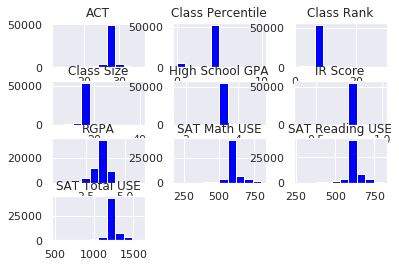

In [12]:
# examine distribution of each column
for col in df.columns:
    df.hist(color='blue')
    break
plt.show()

## Outlier Handling using Upper and Lower Bounds of 3 Standard Deviations

In [13]:
# write a for loop that replaces any upper outlier value with the defined upper bound value 
for col in df.columns:
    u_bound = df[col].mean() + 3* df[col].std()
    df[col][df[col] > u_bound] = u_bound

In [14]:
# check
pd.Series(df[col][df[col]] > u_bound).value_counts()

False    59305
Name: Class Percentile, dtype: int64

In [15]:
# write a for loop that replaces any lower outlier value with the defined lower bound value 
for col in df.columns:
    l_bound = df[col].mean() - 3* df[col].std()
    df[col][df[col] < l_bound] = l_bound

In [16]:
# check
pd.Series(df[col][df[col]] < l_bound).value_counts()

False    59305
Name: Class Percentile, dtype: int64

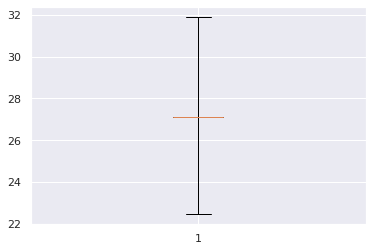

In [18]:
# boxplot of the ACT feature
plt.boxplot(df['ACT'], whis='range')
plt.show()

Text(0.5, 1.0, 'RGPA')

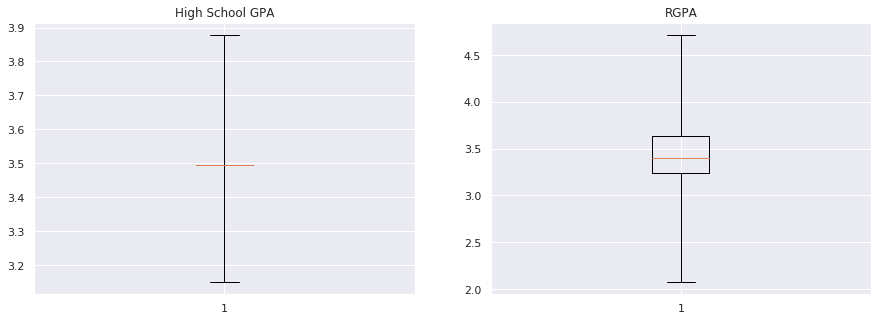

In [17]:
# boxplots for the High School GPA and RGPA features 
fig = plt.figure(figsize=(15,5))
plt.tight_layout()

# specify the subplots 
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# specify graphs for each plot 
ax1.boxplot(df['High School GPA'], whis='range')
ax2.boxplot(df['RGPA'], whis='range')

# set titles for each plot 
ax1.set_title('High School GPA')
ax2.set_title('RGPA')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f838de12b00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f838de21240>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f838de127b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f838de21940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f838de21cc0>],
 'means': []}

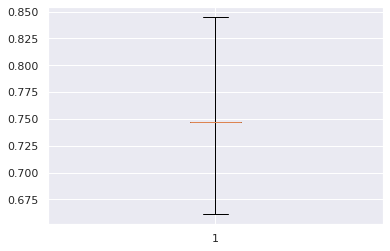

In [19]:
# boxplot for IR Score feature 
plt.boxplot(df['IR Score'], whis='range')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f838df4e438>,
 'caps': [<matplotlib.lines.Line2D at 0x7f838df4eb38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f838df4e0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f838df5a278>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f838df5a5f8>],
 'means': []}

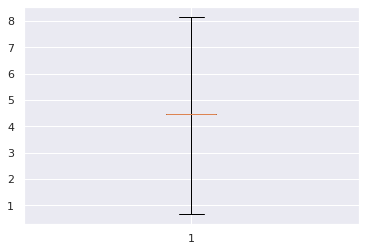

In [20]:
# boxplot for Class Percentile feature 
plt.boxplot(df['Class Percentile'], whis='range')

Text(0.5, 1.0, 'Class Size')

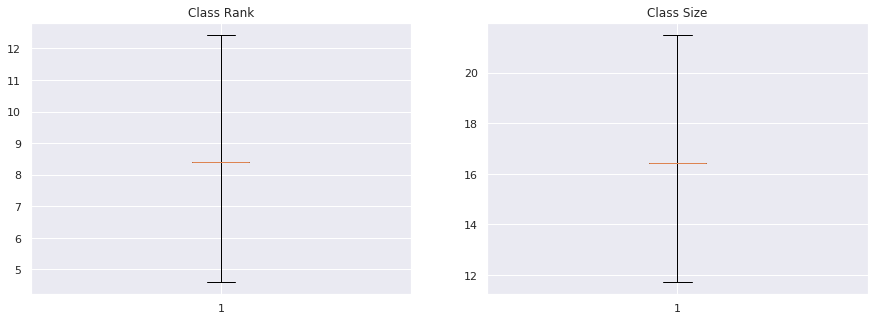

In [21]:
# boxplots for Class Rank and Class Size features 
fig = plt.figure(figsize=(15,5))
plt.tight_layout()

# specify subplots 
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# specify graphs for each plot 
ax1.boxplot(df['Class Rank'], whis='range')
ax2.boxplot(df['Class Size'], whis='range')

# add titles to each plot 
ax1.set_title('Class Rank')
ax2.set_title('Class Size')

Text(0.5, 1.0, 'SAT Total')

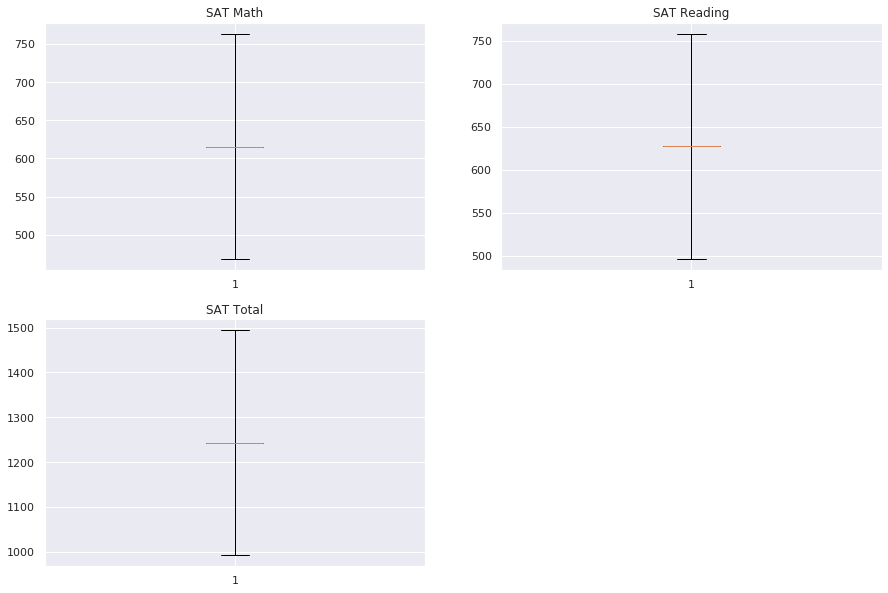

In [22]:
# boxplots for SAT features 
fig = plt.figure(figsize=(15,10))
plt.tight_layout()

# specify subplots 
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

# specify graphs for each plot 
ax1.boxplot(df['SAT Math USE'], whis='range')
ax2.boxplot(df['SAT Reading USE'], whis='range')
ax3.boxplot(df['SAT Total USE'], whis='range')

# add title for each plot 
ax1.set_title('SAT Math')
ax2.set_title('SAT Reading')
ax3.set_title('SAT Total')

## Scaling using Z-Score

In [23]:
# import the preprocessing package from sklearn 
from sklearn import preprocessing

# define column names
names = df.columns

# create scaler variable 
scaler = preprocessing.StandardScaler()

# fit and scale data 
dfstandard = scaler.fit_transform(df)
dfstandard = pd.DataFrame(dfstandard, columns=names)

# check if data was scaled correctly
# mean and stdev should be equal to or almost equal to 0 and 1 respectively 
dfstandard.describe()

,ACT,SAT Math USE,SAT Reading USE,SAT Total USE,RGPA,High School GPA,IR Score,Class Rank,Class Size,Class Percentile
count,5.930500e+04,5.930500e+04,5.930500e+04,5.930500e+04,5.930500e+04,5.930500e+04,5.930500e+04,5.930500e+04,5.930500e+04,5.930500e+04
mean,-3.940843e-15,-5.061441e-16,-2.541444e-15,5.720765e-15,-5.427466e-16,-1.866377e-14,1.495249e-16,-4.591181e-16,2.328179e-15,1.303550e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-3.456857e+00,-3.182200e+00,-3.260786e+00,-3.270119e+00,-3.064933e+00,-4.285455e+00,-4.247275e+00,-3.637981e+00,-3.701231e+00,-3.011022e+00
25%,-1.820966e-02,-1.043258e-02,-1.839892e-02,-1.827863e-02,-3.655563e-01,-2.423055e-02,-2.065985e-02,1.000040e-01,5.450826e-02,1.746246e-01
50%,-1.820966e-02,-1.043258e-02,-1.839892e-02,-1.827863e-02,-5.294679e-03,-2.423055e-02,-2.065985e-02,1.000040e-01,5.450826e-02,1.746246e-01
75%,-1.820966e-02,-1.043258e-02,-1.839892e-02,-1.827863e-02,5.399697e-01,-2.423055e-02,-2.065985e-02,1.000040e-01,5.450826e-02,1.746246e-01
max,3.543256e+00,3.193580e+00,3.237655e+00,3.252288e+00,3.056205e+00,4.752290e+00,4.758976e+00,4.079933e+00,4.082211e+00,3.231471e+00


In [26]:
# export final file to csv to be used for modeling 
dfstandard.to_csv('data/dfc.csv', index=0)